<h3>Unsupervised Learning: Dataset 2

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv("Wholesale_customers_data.csv")

In [4]:
raw_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# Null values:
raw_data.isnull().sum()
# No null values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
raw_data.describe(include='all')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
# Checking for duplicates:
unique_rows = raw_data.drop_duplicates().shape[0]
duplicate_rows = len(raw_data) - unique_rows

print(f"Total rows: {len(raw_data)}")
print(f"Unique rows: {unique_rows}")
print(f"'Duplicate' rows: {duplicate_rows}")

Total rows: 440
Unique rows: 440
'Duplicate' rows: 0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
raw_data['Channel']

0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64

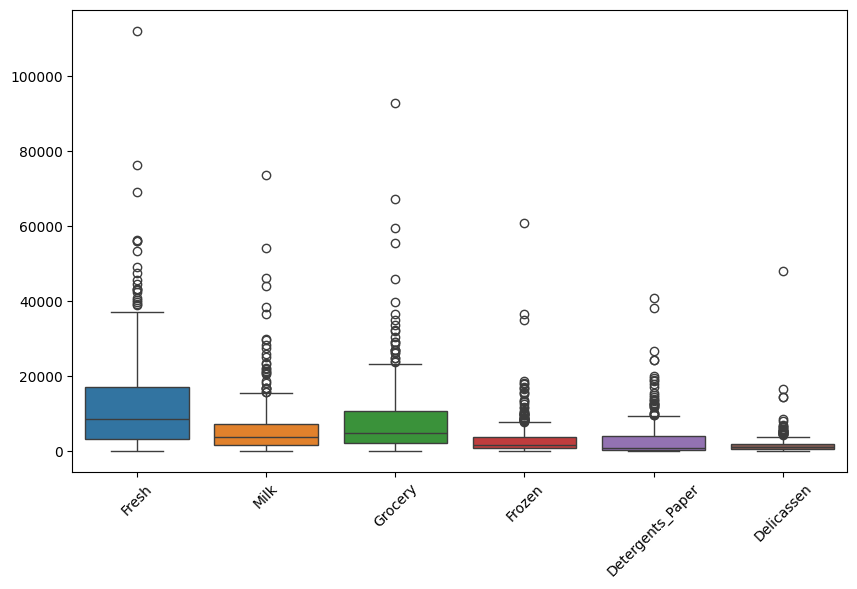

In [11]:
# Checking data distribution and outliers:
plt.figure(figsize=(10, 6))
sns.boxplot(data=raw_data[["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]])
plt.xticks(rotation=45)
plt.show()

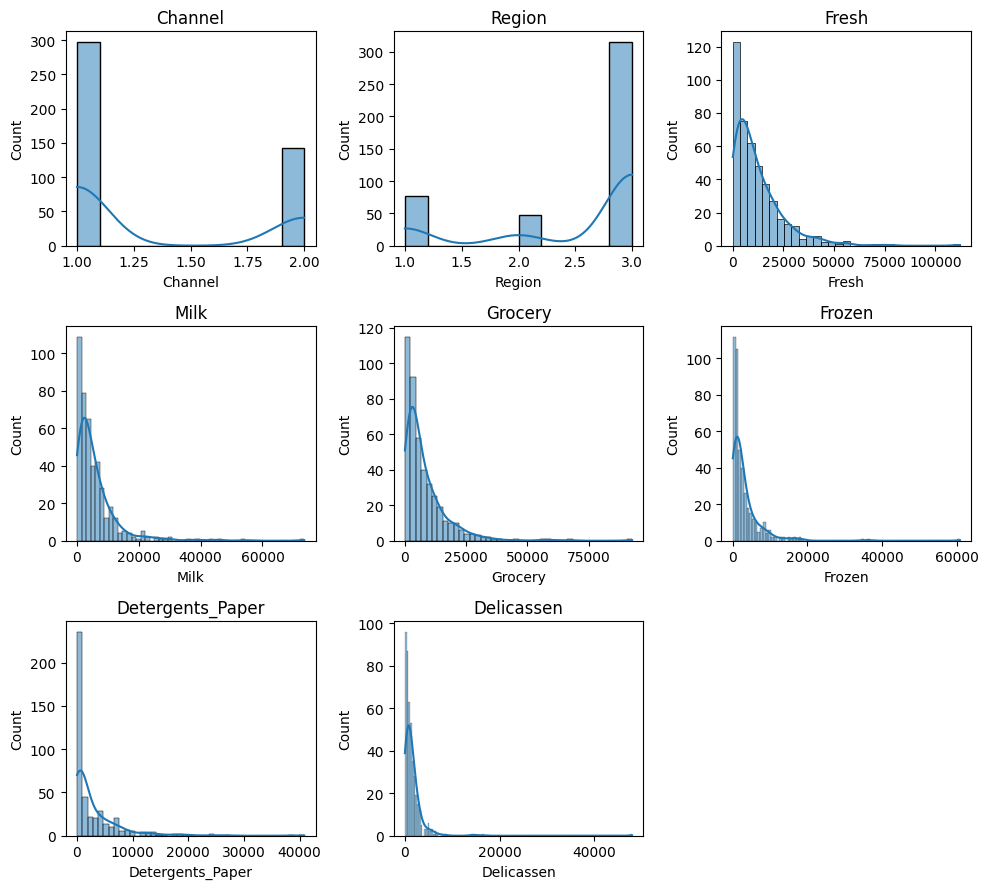

In [12]:
numeric_cols = raw_data.select_dtypes(include=['number']).columns
categorical_cols = raw_data.select_dtypes(exclude=['number']).columns

# Total number of plots
all_cols = list(raw_data.columns)
n_cols = 3  # number of grid columns
n_rows = int(np.ceil(len(all_cols) / n_cols))

plt.figure(figsize=(10, n_rows * 3))

for i, col in enumerate(all_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    if col in numeric_cols:
        # Numeric -> histogram
        sns.histplot(raw_data[col], kde=True)
    else:
        # Categorical -> count plot
        sns.countplot(x=raw_data[col], order=raw_data[col].value_counts().index)
        plt.xticks(rotation=45)
    
    plt.title(col)

plt.tight_layout()
plt.show()

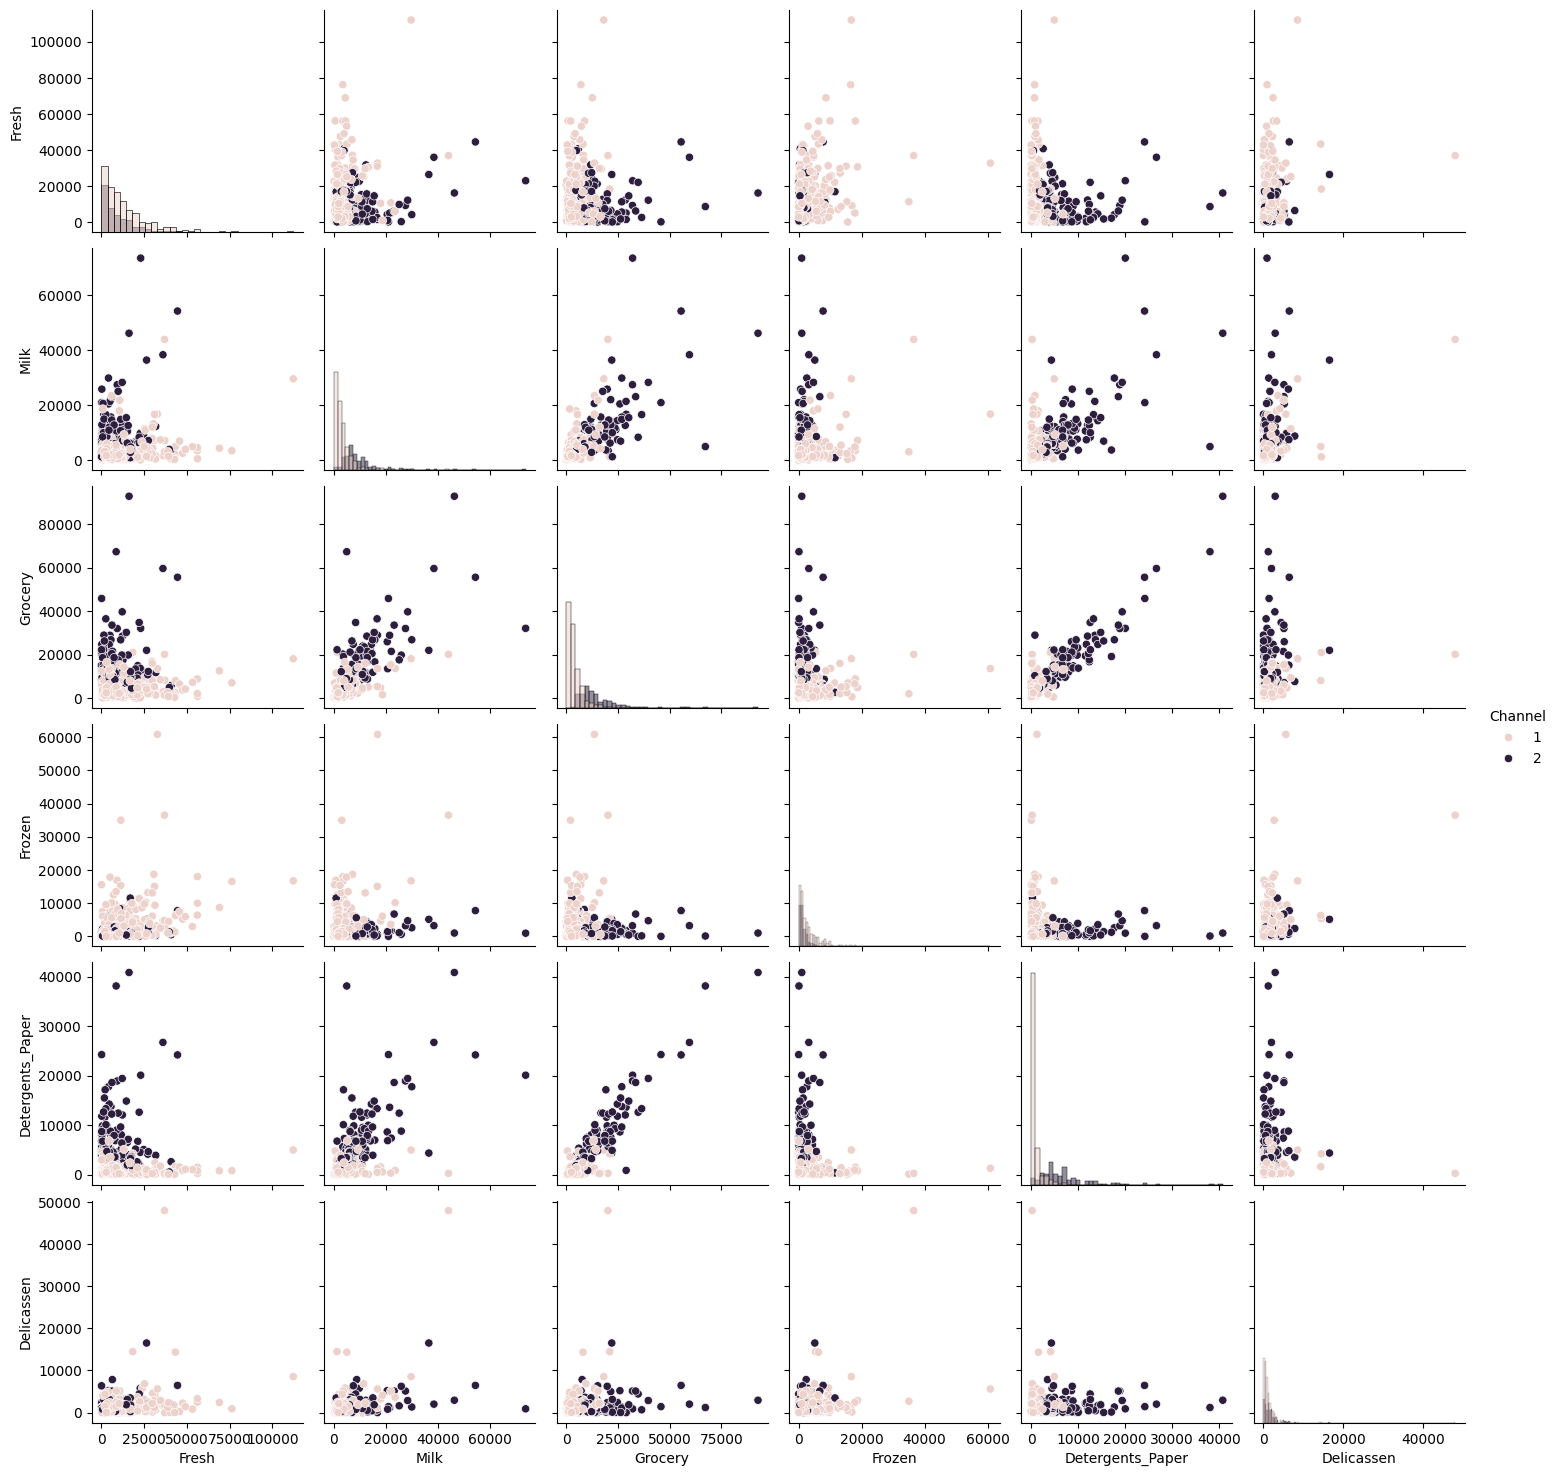

In [ ]:
# Pairwise relationships (pairplot):

# hue: Channel
sns.pairplot(
    raw_data,
    vars=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"],
    hue="Channel",
    diag_kind="hist"
)

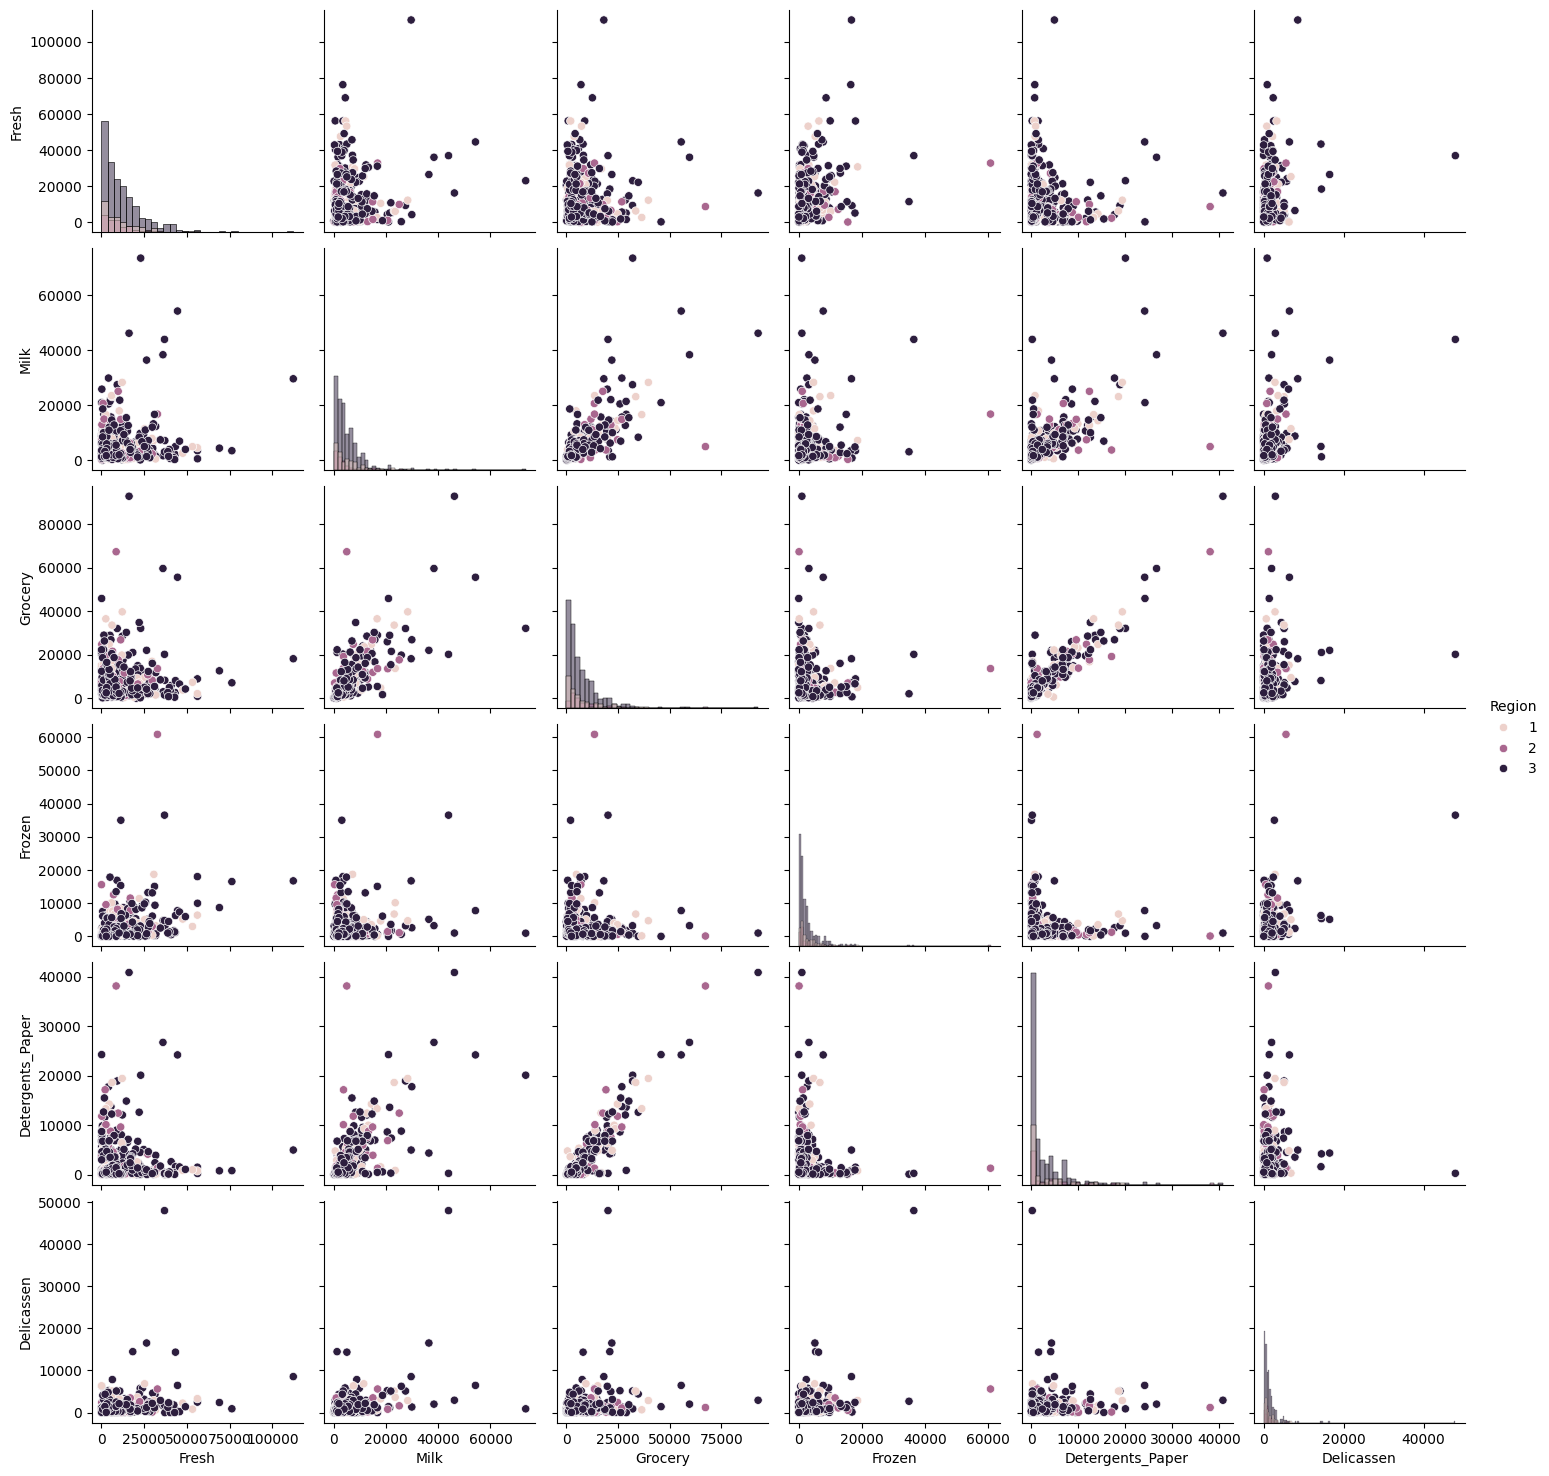

In [14]:
# hue: Region
sns.pairplot(
    raw_data,
    vars=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"],
    hue="Region",
    diag_kind="hist"
)

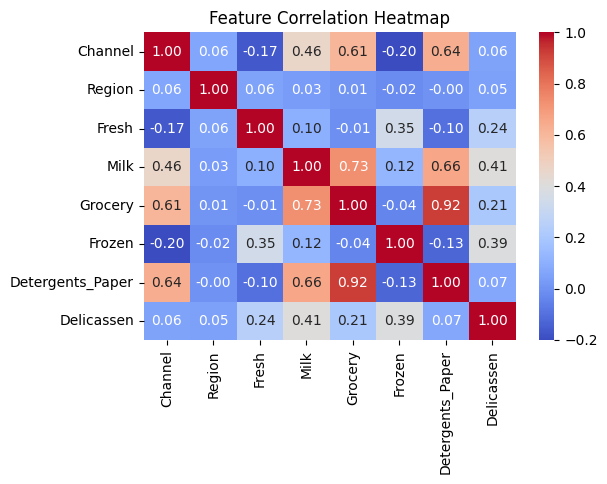

In [15]:
# Correlation heatmap:
plt.figure(figsize=(6, 4))
sns.heatmap(
    raw_data[numeric_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Feature Correlation Heatmap")
plt.show()

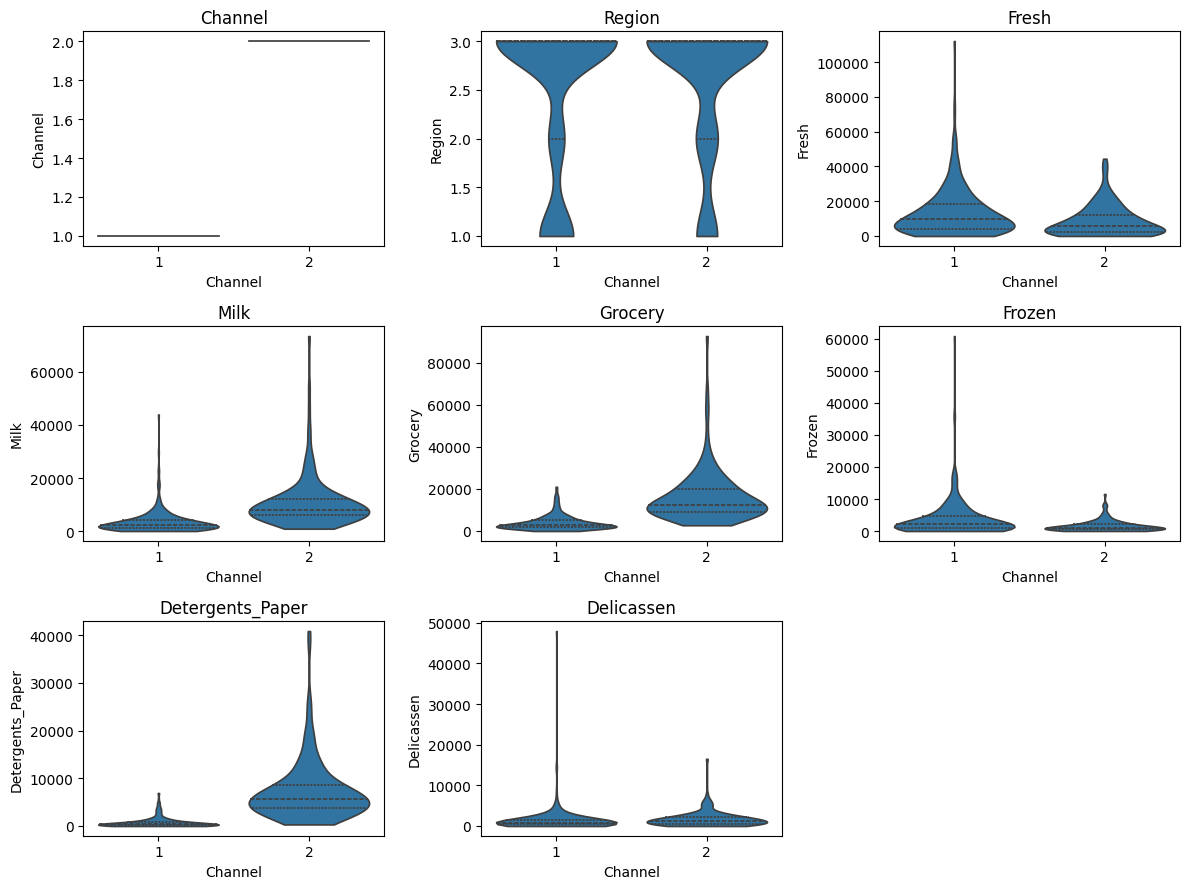

In [17]:
# Grid of violin plots per column with Channel as x
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

for idx, c in enumerate(all_cols):
    sns.violinplot(data=raw_data, x="Channel", y=c, inner="quartile", cut=0, density_norm='width', ax=axes[idx])
    axes[idx].set_title(c)
    axes[idx].set_xlabel("Channel")
    axes[idx].set_ylabel(c)

# Hide any unused subplots
for j in range(len(all_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

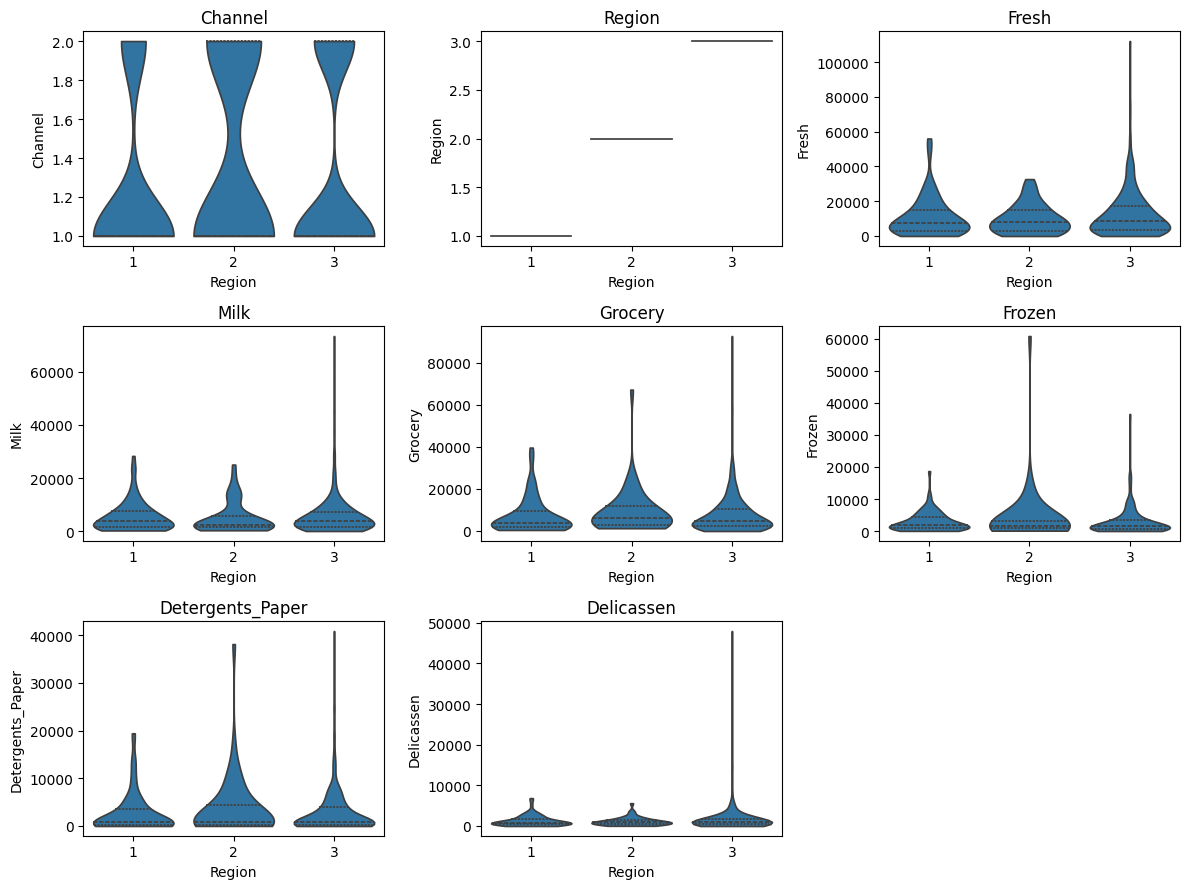

In [18]:
# Grid of violin plots per column with Region as x
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

for idx, c in enumerate(all_cols):
    sns.violinplot(data=raw_data, x="Region", y=c, inner="quartile", cut=0, density_norm='width', ax=axes[idx])
    axes[idx].set_title(c)
    axes[idx].set_xlabel("Region")
    axes[idx].set_ylabel(c)

# Hide any unused subplots
for j in range(len(all_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

<h4>Preparing Data for Modelling

<h5>Scaling